In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.
/anaconda3/envs/nlpclass/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
data = pd.read_csv('data_combined.csv')
data = data[(data.Runtime >= 50) & (data.Runtime <= 200) & 
            (data.Year >= 1990)]
data.describe()

,Adjusted_BoxOffice,BoxOffice,NLP_Score,Runtime,Year,imdbRating,imdbVotes,Internet_Movie_Database,Rotten_Tomatoes,Metacritic,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Country_count
count,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,9.322000e+03,9322.000000,9322.000000,9322.000000,...,9322.000000,9322.000000,9322.000000,9322.000000,9322.0,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000
mean,28.648639,21.948306,9.158985,104.624973,2005.691697,6.378696,5.093996e+04,6.378696,5.706821,5.648604,...,0.078631,0.002253,0.225595,0.064578,0.0,0.031216,0.204784,0.030573,0.011049,1.535078
std,64.164851,51.199261,5.261931,17.940863,7.626457,1.004886,1.191995e+05,1.004886,2.639098,1.517948,...,0.269177,0.047412,0.417996,0.245794,0.0,0.173912,0.403566,0.172167,0.104538,0.974243
min,0.000082,0.000074,1.046110,53.000000,1990.000000,1.100000,6.000000e+00,1.100000,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.082429,0.066174,4.624634,92.000000,2000.000000,5.800000,2.052000e+03,5.800000,3.700000,4.800000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.657188,1.250904,8.212019,101.000000,2007.000000,6.500000,9.069500e+03,6.500000,5.940134,5.756893,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,29.015950,21.010307,12.778660,113.000000,2012.000000,7.100000,4.437925e+04,7.100000,8.000000,6.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
max,1039.048028,936.658640,28.108077,197.000000,2018.000000,9.300000,2.018482e+06,9.300000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,16.000000


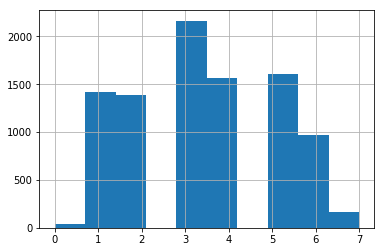

In [8]:
# transfer to category
log_boxoffice = np.log(data['Adjusted_BoxOffice'])
cat_raw = pd.cut(log_boxoffice, [-10,-6,-4,-2,0,2,4,6,10])
all_cats = cat_raw.unique()
cat_encoder = dict([(i,x) for x,i in enumerate(all_cats)])
data['Adjusted_BoxOffice_Cat'] = cat_raw.replace(cat_encoder)
data['Adjusted_BoxOffice_Cat'].hist()

In [9]:
#Baseline Model: A simple logistic regression

data_model1 = data[['Adjusted_BoxOffice_Cat', 'Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count']]

X = data_model1.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model1['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_clf = LogisticRegression()
scores = cross_val_score(lr_clf, X_train, y_train, cv=5)

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('Baseline Model1: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))


data_model2 = data[['Adjusted_BoxOffice_Cat', 'Runtime','Year', 'imdbRating', 'imdbVotes',
       'Internet_Movie_Database', 'Rotten_Tomatoes', 'Metacritic',
       'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count']]

X = data_model2.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model2['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_clf = LogisticRegression()
scores = cross_val_score(lr_clf, X_train, y_train, cv=5)

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('Baseline Model2: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

Baseline Model1: CV Accuracy: 31.663 | Testing Accuracy: 31.641
Baseline Model2: CV Accuracy: 40.245 | Testing Accuracy: 41.974


In [10]:
# LR with NLP
data_model3 = data[['Adjusted_BoxOffice_Cat', 'Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count','NLP_Score']]

X = data_model3.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model3['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


lr_clf = LogisticRegression()
scores = cross_val_score(lr_clf, X_train, y_train, cv=5)

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('LR(NLP): CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

LR(NLP): CV Accuracy: 35.554 | Testing Accuracy: 36.539


In [6]:
# SVM
data_model4 = data_model3
X = data_model4.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model4['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


svm_clf = svm.SVC(decision_function_shape='ovo')
scores = cross_val_score(svm_clf, X_train, y_train, cv=5)

svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
tst_acc = accuracy_score(y_test, y_pred) * 100
cv_acc = np.mean(scores) * 100
print('SVM: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))


SVM: CV Accuracy: 34.682 | Testing Accuracy: 35.967


In [12]:
#KNN
data_model5 = data_model3
X = data_model5.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model5['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

for k in range(1,601,100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(neigh, X_train, y_train, cv=5)

    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    tst_acc = accuracy_score(y_test, y_pred) * 100
    cv_acc = np.mean(scores) * 100
    print('KNN: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))


KNN: CV Accuracy: 26.037 | Testing Accuracy: 26.707
KNN: CV Accuracy: 31.603 | Testing Accuracy: 33.214
KNN: CV Accuracy: 31.955 | Testing Accuracy: 33.035
KNN: CV Accuracy: 31.542 | Testing Accuracy: 32.320
KNN: CV Accuracy: 31.081 | Testing Accuracy: 32.142
KNN: CV Accuracy: 30.791 | Testing Accuracy: 31.748


In [13]:
#Random Forest

data_model6 = data_model3
X = data_model6.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model6['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)
for dep in range(2, 22,2):
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=dep)
    scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    tst_acc = accuracy_score(y_test, y_pred) * 100
    cv_acc = np.mean(scores) * 100
    print('RF: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))


RF: CV Accuracy: 32.614 | Testing Accuracy: 32.249
RF: CV Accuracy: 34.207 | Testing Accuracy: 35.753
RF: CV Accuracy: 35.755 | Testing Accuracy: 36.682
RF: CV Accuracy: 36.765 | Testing Accuracy: 37.504
RF: CV Accuracy: 36.552 | Testing Accuracy: 38.970
RF: CV Accuracy: 36.780 | Testing Accuracy: 37.969
RF: CV Accuracy: 36.059 | Testing Accuracy: 37.934
RF: CV Accuracy: 35.799 | Testing Accuracy: 36.932
RF: CV Accuracy: 34.160 | Testing Accuracy: 35.467
RF: CV Accuracy: 33.899 | Testing Accuracy: 34.537


In [15]:
for num in range(10, 210,20):
    rf_clf = RandomForestClassifier(n_estimators=num, max_depth=10)
    scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    tst_acc = accuracy_score(y_test, y_pred) * 100
    cv_acc = np.mean(scores) * 100
    print('RF: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

RF: CV Accuracy: 35.140 | Testing Accuracy: 36.718
RF: CV Accuracy: 36.751 | Testing Accuracy: 38.184
RF: CV Accuracy: 36.566 | Testing Accuracy: 37.826
RF: CV Accuracy: 36.827 | Testing Accuracy: 38.827
RF: CV Accuracy: 36.858 | Testing Accuracy: 38.148
RF: CV Accuracy: 36.858 | Testing Accuracy: 38.613
RF: CV Accuracy: 36.905 | Testing Accuracy: 38.112
RF: CV Accuracy: 36.950 | Testing Accuracy: 37.969
RF: CV Accuracy: 37.149 | Testing Accuracy: 38.112
RF: CV Accuracy: 37.103 | Testing Accuracy: 38.220


In [17]:
for mini in range(2, 22,2):
    rf_clf = RandomForestClassifier(n_estimators=70, max_depth=10, min_samples_split = mini)
    scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    tst_acc = accuracy_score(y_test, y_pred) * 100
    cv_acc = np.mean(scores) * 100
    print('RF: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

RF: CV Accuracy: 36.613 | Testing Accuracy: 37.862
RF: CV Accuracy: 36.751 | Testing Accuracy: 38.148
RF: CV Accuracy: 37.042 | Testing Accuracy: 37.934
RF: CV Accuracy: 36.721 | Testing Accuracy: 38.363
RF: CV Accuracy: 36.750 | Testing Accuracy: 37.969
RF: CV Accuracy: 36.337 | Testing Accuracy: 38.363
RF: CV Accuracy: 36.827 | Testing Accuracy: 38.398
RF: CV Accuracy: 36.767 | Testing Accuracy: 38.291
RF: CV Accuracy: 36.614 | Testing Accuracy: 38.184
RF: CV Accuracy: 37.087 | Testing Accuracy: 38.005


In [22]:
for leaf in range(50, 1000,50):
    rf_clf = RandomForestClassifier(n_estimators=70, max_depth=10, min_samples_split = 14, max_leaf_nodes = leaf)
    scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    tst_acc = accuracy_score(y_test, y_pred) * 100
    cv_acc = np.mean(scores) * 100
    print('RF: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

RF: CV Accuracy: 36.720 | Testing Accuracy: 37.075
RF: CV Accuracy: 36.996 | Testing Accuracy: 38.792
RF: CV Accuracy: 36.720 | Testing Accuracy: 38.077
RF: CV Accuracy: 37.072 | Testing Accuracy: 38.470
RF: CV Accuracy: 37.041 | Testing Accuracy: 38.005
RF: CV Accuracy: 36.934 | Testing Accuracy: 38.541
RF: CV Accuracy: 37.103 | Testing Accuracy: 38.112
RF: CV Accuracy: 36.826 | Testing Accuracy: 38.077
RF: CV Accuracy: 36.919 | Testing Accuracy: 37.969
RF: CV Accuracy: 36.996 | Testing Accuracy: 38.112
RF: CV Accuracy: 37.134 | Testing Accuracy: 38.470
RF: CV Accuracy: 37.332 | Testing Accuracy: 38.684
RF: CV Accuracy: 36.397 | Testing Accuracy: 38.756
RF: CV Accuracy: 36.995 | Testing Accuracy: 38.291
RF: CV Accuracy: 36.734 | Testing Accuracy: 38.649
RF: CV Accuracy: 37.241 | Testing Accuracy: 38.899
RF: CV Accuracy: 37.317 | Testing Accuracy: 37.934
RF: CV Accuracy: 37.118 | Testing Accuracy: 38.470
RF: CV Accuracy: 36.567 | Testing Accuracy: 38.077


In [25]:
# GB
from sklearn.ensemble import GradientBoostingClassifier 
data_model10 = data_model3
X = data_model10.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model10['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)
for lr in [0.01, 0.1, 0.4, 0.618]:
    gb_clf = GradientBoostingClassifier(learning_rate=lr)
    scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    tst_acc = accuracy_score(y_test, y_pred) * 100
    cv_acc = np.mean(scores) * 100
    print('GB: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

GB: CV Accuracy: 37.364 | Testing Accuracy: 35.753
GB: CV Accuracy: 37.149 | Testing Accuracy: 37.790
GB: CV Accuracy: 36.796 | Testing Accuracy: 34.787
GB: CV Accuracy: 36.766 | Testing Accuracy: 33.107


In [27]:
# GB
from sklearn.ensemble import GradientBoostingClassifier 
data_model10 = data_model3
X = data_model10.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model10['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)
for num in [10, 50, 100, 200, 500]:
    gb_clf = GradientBoostingClassifier(n_estimators=num, learning_rate=0.1)
    scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    tst_acc = accuracy_score(y_test, y_pred) * 100
    cv_acc = np.mean(scores) * 100
    print('GB: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

GB: CV Accuracy: 37.164 | Testing Accuracy: 35.788
GB: CV Accuracy: 36.751 | Testing Accuracy: 37.361
GB: CV Accuracy: 37.149 | Testing Accuracy: 37.755
GB: CV Accuracy: 36.644 | Testing Accuracy: 37.290
GB: CV Accuracy: 36.490 | Testing Accuracy: 35.395


In [28]:
# GB
from sklearn.ensemble import GradientBoostingClassifier 
data_model10 = data_model3
X = data_model10.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model10['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)
for mini in [2, 10, 20, 50, 100]:
    gb_clf = GradientBoostingClassifier(min_samples_split = mini, n_estimators=100, learning_rate=0.1)
    scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    tst_acc = accuracy_score(y_test, y_pred) * 100
    cv_acc = np.mean(scores) * 100
    print('GB: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

GB: CV Accuracy: 36.613 | Testing Accuracy: 37.898
GB: CV Accuracy: 37.410 | Testing Accuracy: 38.077
GB: CV Accuracy: 37.056 | Testing Accuracy: 38.220
GB: CV Accuracy: 37.502 | Testing Accuracy: 37.826
GB: CV Accuracy: 37.042 | Testing Accuracy: 37.647


In [29]:
# GB
from sklearn.ensemble import GradientBoostingClassifier 
data_model10 = data_model3
X = data_model10.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_model10['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)
for dep in [2, 5, 10, 20, 50]:
    gb_clf = GradientBoostingClassifier(max_depth = dep, min_samples_split = 20, n_estimators=100, learning_rate=0.1)
    scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    tst_acc = accuracy_score(y_test, y_pred) * 100
    cv_acc = np.mean(scores) * 100
    print('GB: CV Accuracy: %0.3f | Testing Accuracy: %0.3f' % (cv_acc,tst_acc))

GB: CV Accuracy: 37.149 | Testing Accuracy: 38.470
GB: CV Accuracy: 37.010 | Testing Accuracy: 36.789
GB: CV Accuracy: 36.934 | Testing Accuracy: 33.750
GB: CV Accuracy: 36.627 | Testing Accuracy: 32.749
GB: CV Accuracy: 37.593 | Testing Accuracy: 32.177


In [9]:
def one_hot_encoding(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_y = encoder.transform(y)
    dummy_y = np_utils.to_categorical(encoded_y)
    return (dummy_y)

data_nn = data[['Adjusted_BoxOffice_Cat', 'Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count','NLP_Score']]


X = data_nn.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_nn['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

dummy_y_train = one_hot_encoding(y_train)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(16, input_dim=data_nn.shape[1]-1, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(all_cats), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, dummy_y_train, batch_size = 10, epochs = 100)

predictions = model.predict_classes(X_test)
prediction_ = np.argmax(np_utils.to_categorical(predictions), axis = 1)

accuracy_score(y_test, y_pred)

Epoch 1/100
6525/6525 [==============================] - 1s 114us/step - loss: 2.0246 - acc: 0.2025
Epoch 2/100
6525/6525 [==============================] - 0s 53us/step - loss: 1.7877 - acc: 0.3027
Epoch 3/100
6525/6525 [==============================] - 0s 52us/step - loss: 1.6687 - acc: 0.3309
Epoch 4/100
6525/6525 [==============================] - 0s 54us/step - loss: 1.5972 - acc: 0.3476
Epoch 5/100
6525/6525 [==============================] - 0s 53us/step - loss: 1.5591 - acc: 0.3534
Epoch 6/100
6525/6525 [==============================] - 0s 54us/step - loss: 1.5386 - acc: 0.3603
Epoch 7/100
6525/6525 [==============================] - 0s 54us/step - loss: 1.5248 - acc: 0.3674
Epoch 8/100
6525/6525 [==============================] - 0s 53us/step - loss: 1.5161 - acc: 0.3726
Epoch 9/100
6525/6525 [==============================] - 0s 53us/step - loss: 1.5083 - acc: 0.3752
Epoch 10/100
6525/6525 [==============================] - 0s 52us/step - loss: 1.5030 - acc: 0.3810
Epoch 11

Epoch 83/100
6525/6525 [==============================] - 0s 48us/step - loss: 1.4143 - acc: 0.4192
Epoch 84/100
6525/6525 [==============================] - 0s 54us/step - loss: 1.4128 - acc: 0.4166
Epoch 85/100
6525/6525 [==============================] - 0s 57us/step - loss: 1.4133 - acc: 0.4184
Epoch 86/100
6525/6525 [==============================] - 0s 61us/step - loss: 1.4119 - acc: 0.4176
Epoch 87/100
6525/6525 [==============================] - 0s 53us/step - loss: 1.4121 - acc: 0.4175
Epoch 88/100
6525/6525 [==============================] - 0s 62us/step - loss: 1.4114 - acc: 0.4192
Epoch 89/100
6525/6525 [==============================] - 0s 52us/step - loss: 1.4115 - acc: 0.4185
Epoch 90/100
6525/6525 [==============================] - 0s 59us/step - loss: 1.4104 - acc: 0.4170
Epoch 91/100
6525/6525 [==============================] - 0s 61us/step - loss: 1.4099 - acc: 0.4182
Epoch 92/100
6525/6525 [==============================] - 0s 68us/step - loss: 1.4100 - acc: 0.4179


0.37397211297819094

In [56]:
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
def one_hot_encoding(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_y = encoder.transform(y)
    dummy_y = np_utils.to_categorical(encoded_y)
    return (dummy_y)

data_nn = data[['Adjusted_BoxOffice_Cat', 'Runtime',
        'Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Country_count','NLP_Score']]


X = data_nn.drop('Adjusted_BoxOffice_Cat',axis = 1)
y = data_nn['Adjusted_BoxOffice_Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1)

dummy_y_train = one_hot_encoding(y_train)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(512, input_dim=data_nn.shape[1]-1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(len(all_cats), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
model.fit(X_train, dummy_y_train, batch_size = 64, epochs = 400, callbacks=callbacks, validation_data=(X_test, one_hot_encoding(y_test)))

predictions = model.predict_classes(X_test)
prediction_ = np.argmax(np_utils.to_categorical(predictions), axis = 1)

#accuracy_score(y_test, y_pred)

Train on 7457 samples, validate on 1865 samples
Epoch 1/400
7457/7457 [==============================] - 2s 318us/step - loss: 2.4086 - acc: 0.2638 - val_loss: 2.1019 - val_acc: 0.3657
Epoch 2/400
7457/7457 [==============================] - 1s 88us/step - loss: 2.0510 - acc: 0.3284 - val_loss: 1.9323 - val_acc: 0.3689
Epoch 3/400
7457/7457 [==============================] - 1s 97us/step - loss: 1.9089 - acc: 0.3424 - val_loss: 1.8242 - val_acc: 0.3786
Epoch 4/400
7457/7457 [==============================] - 1s 100us/step - loss: 1.8138 - acc: 0.3518 - val_loss: 1.7688 - val_acc: 0.3769
Epoch 5/400
7457/7457 [==============================] - 1s 94us/step - loss: 1.7514 - acc: 0.3617 - val_loss: 1.7177 - val_acc: 0.3748
Epoch 6/400
7457/7457 [==============================] - 1s 93us/step - loss: 1.7026 - acc: 0.3586 - val_loss: 1.6846 - val_acc: 0.3796
Epoch 7/400
7457/7457 [==============================] - 1s 98us/step - loss: 1.6712 - acc: 0.3646 - val_loss: 1.6642 - val_acc: 0.387